<a href="https://colab.research.google.com/github/Abhinavmls/Predictive_Analysis/blob/House_price_prediction/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the data:
   square_feet  bedrooms  bathrooms   price
0         1000         2          1  150000
1         1500         3          2  250000
2         1200         2          1  180000
3         2000         4          2  350000
4         1800         3          2  300000

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   square_feet  8 non-null      int64
 1   bedrooms     8 non-null      int64
 2   bathrooms    8 non-null      int64
 3   price        8 non-null      int64
dtypes: int64(4)
memory usage: 388.0 bytes

Data Description:
       square_feet  bedrooms  bathrooms          price
count     8.000000  8.000000   8.000000       8.000000
mean   1900.000000  3.250000   2.000000  328750.000000
std     669.754753  1.035098   0.755929  136427.636496
min    1000.000000  2.000000   1.000000  150000.000000
25%    1425.000000  2

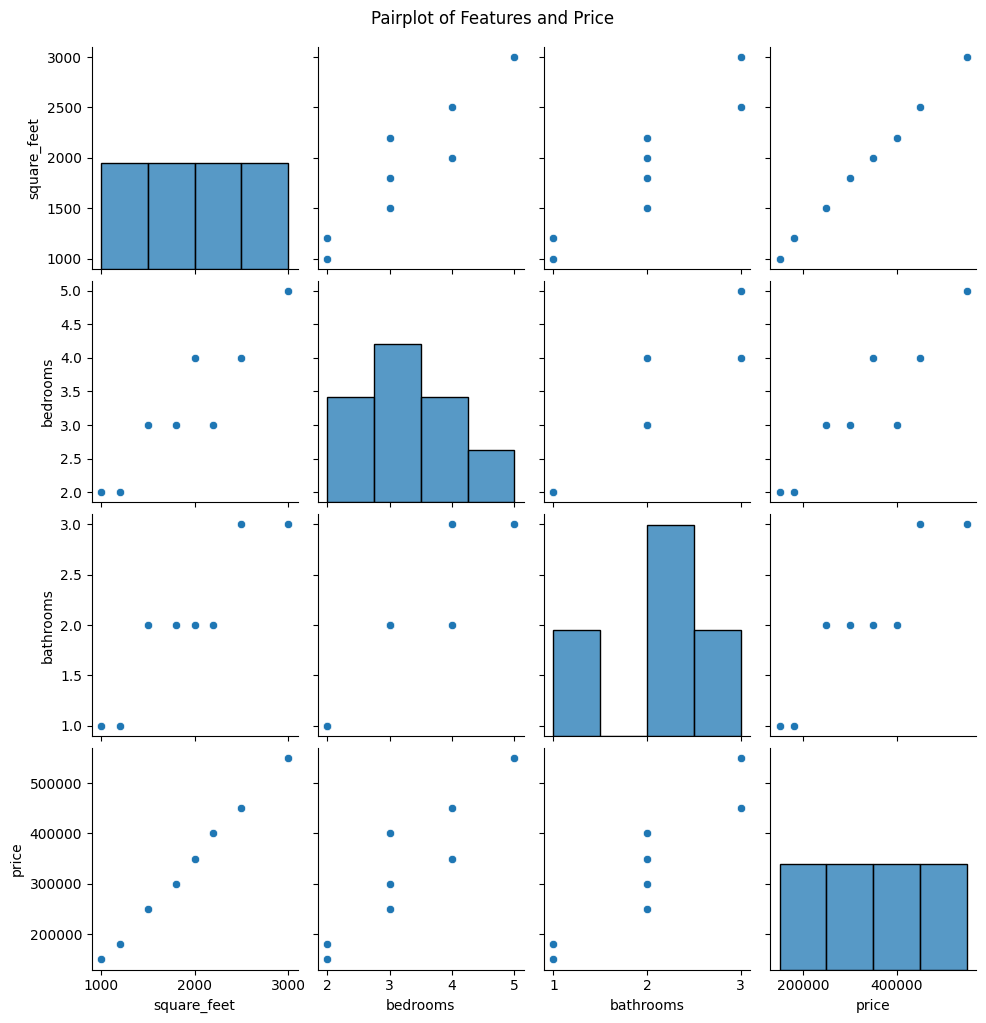


Training data shape: (6, 3)
Testing data shape: (2, 3)

Mean Squared Error (MSE): 160900104.06
R-squared (R2): 0.98


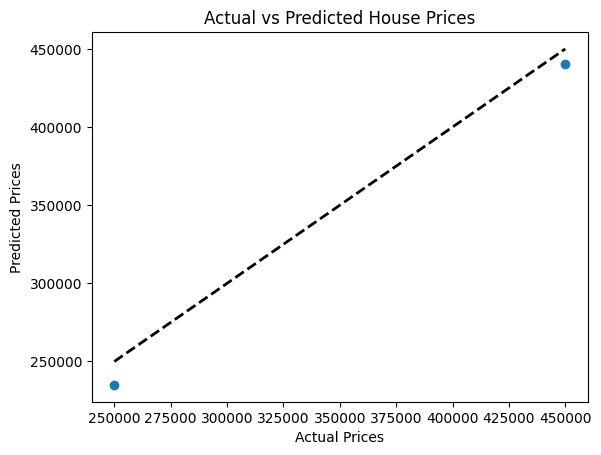


Predicted price for a new house with 1600 sq ft, 3 beds, 2 baths: $257,741.94


In [9]:
# prompt: house price prediction

# Install necessary libraries
!pip install scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset path or URL)
# Example: using a sample dataset from scikit-learn
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df['PRICE'] = boston.target

# Or, if you have a CSV file in your Drive
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/My Drive/house_data.csv')

# For demonstration, let's create a simple dummy dataset
data = {'square_feet': [1000, 1500, 1200, 2000, 1800, 2500, 2200, 3000],
        'bedrooms': [2, 3, 2, 4, 3, 4, 3, 5],
        'bathrooms': [1, 2, 1, 2, 2, 3, 2, 3],
        'price': [150000, 250000, 180000, 350000, 300000, 450000, 400000, 550000]}
df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print("First 5 rows of the data:")
print(df.head())

# Basic data exploration
print("\nData Info:")
df.info()

print("\nData Description:")
print(df.describe())

# Visualize relationships between features and target
sns.pairplot(df)
plt.suptitle("Pairplot of Features and Price", y=1.02)
plt.show()

# Prepare the data for training
# Define features (X) and target (y)
X = df[['square_feet', 'bedrooms', 'bathrooms']] # Features
y = df['price'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the predictions vs actual values (optional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Plotting the ideal line
plt.show()

# Example prediction for a new house
new_house = pd.DataFrame({'square_feet': [1600], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_house)
print(f"\nPredicted price for a new house with {new_house['square_feet'].iloc[0]} sq ft, {new_house['bedrooms'].iloc[0]} beds, {new_house['bathrooms'].iloc[0]} baths: ${predicted_price[0]:,.2f}")
